In [186]:
import pandas as pd
import numpy as np

In [187]:
from scipy.stats import f_oneway

In [188]:
g1 = np.array([23,20,22,21,24])
g2 = np.array([30,28,29,32,31])
g3 = np.array([27,26,25,28,27])

In [189]:
f_stat,p_val = f_oneway(g1,g2,g3)
print("F_stat: ",f_stat)
print("P_val: ",p_val)


F_stat:  38.380952380952266
P_val:  6.1055922381255985e-06


In [190]:
alpha = 0.05
if p_val<alpha:
    print('Reject, at least one mean is diff')
else:
    print('Fail to reject, no significant difference')

Reject, at least one mean is diff


In [191]:
group1_low = [10, 12, 11, 9, 10]
group2_low = [11, 10, 12, 9, 11]
group3_low = [10, 9, 11, 12, 10]

# ----------------------------
# Example 2: High F-statistic
# ----------------------------
group1_high = [10, 11, 9, 10, 10]
group2_high = [30, 32, 31, 29, 30]
group3_high = [50, 51, 49, 52, 50]

# ----------------------------
# Compute F-statistics
# ----------------------------
F_low, p_low = f_oneway(group1_low, group2_low, group3_low)
F_high, p_high = f_oneway(group1_high, group2_high, group3_high)

print("Low F-example: F =", F_low, ", p =", p_low)
print("High F-example: F =", F_high, ", p =", p_high)

Low F-example: F = 0.05128205128205127 , p = 0.9502177235065065
High F-example: F = 1974.4516129034287 , p = 7.732538412545379e-16


In [192]:
alpha = 0.05
if p_high<alpha:
    print('Reject, at least one mean is diff')
else:
    print('Fail to reject, no significant difference')

Reject, at least one mean is diff


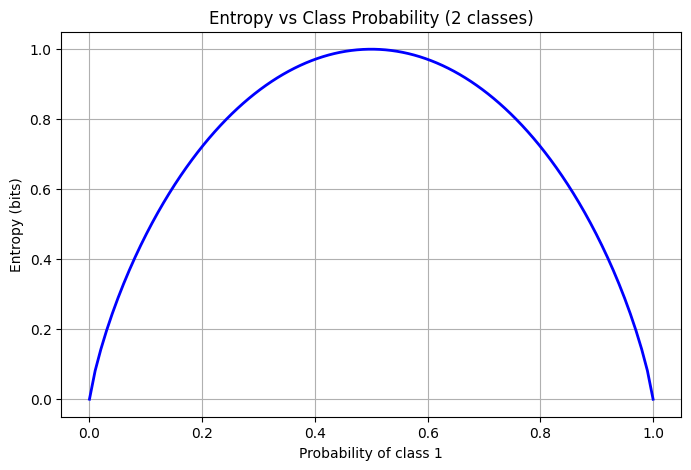

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# 1. Probability of class 1
# ----------------------------
p = np.linspace(0, 1, 100)
# Entropy formula for 2 classes
entropy = - (p * np.log2(p + 1e-9) + (1 - p) * np.log2(1 - p + 1e-9))  # add small value to avoid log(0)

# ----------------------------
# 2. Plot
# ----------------------------
plt.figure(figsize=(8, 5))
plt.plot(p, entropy, color='blue', lw=2)
plt.title("Entropy vs Class Probability (2 classes)")
plt.xlabel("Probability of class 1")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.show()


Explained variance ratio: [0.22758111 0.17627165]


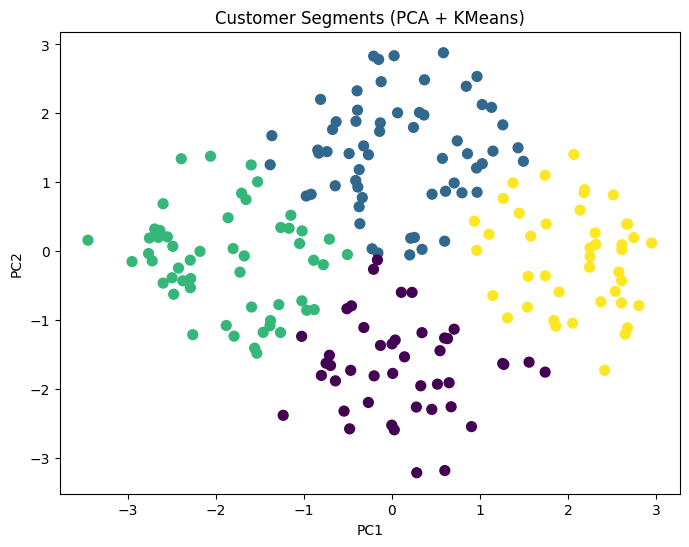

   feature_0  feature_1  feature_2  ...  feature_8  feature_9  cluster
0  37.454012  95.071431  32.580266  ...  60.111501  70.807258        2
1   2.058449  96.990985   4.116548  ...  43.194502  29.122914        2
2  61.185289  13.949386  58.010777  ...  59.241457   4.645041        3
3  60.754485  17.052412  51.099050  ...  68.423303  44.015249        3
4  12.203823  49.517691  12.482556  ...  54.671028  18.485446        2

[5 rows x 11 columns]


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ----------------------------
# 1. Generate synthetic customer data
# ----------------------------
np.random.seed(42)
n_customers = 200
n_features = 10  # e.g., spending in 10 categories + age, income, engagement

# Simulate correlated features (some redundancy)
X = np.random.rand(n_customers, n_features) * 100
X[:, 2] = X[:, 0] * 0.8 + np.random.rand(n_customers) * 10  # correlated with feature 0
X[:, 3] = X[:, 1] * 0.5 + np.random.rand(n_customers) * 15  # correlated with feature 1

# Convert to DataFrame for easier handling
feature_names = [f'feature_{i}' for i in range(n_features)]
df = pd.DataFrame(X, columns=feature_names)

# ----------------------------
# 2. Standardize data
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# ----------------------------
# 3. Apply PCA
# ----------------------------
pca = PCA(n_components=2)  # reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# ----------------------------
# 4. Cluster with KMeans
# ----------------------------
k = 4  # number of customer segments
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_pca)

# ----------------------------
# 5. Visualize clusters
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segments (PCA + KMeans)')
plt.show()

# ----------------------------
# 6. Attach cluster labels to DataFrame
# ----------------------------
df['cluster'] = labels
print(df.head())



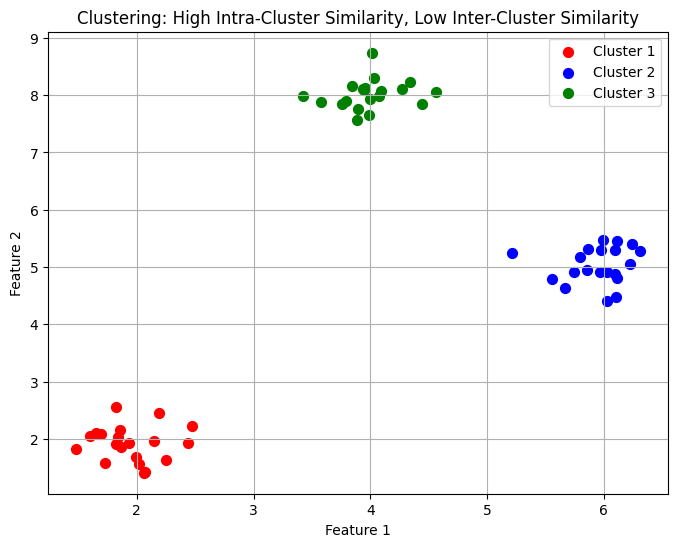

In [195]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Sample cluster points
# ----------------------------
np.random.seed(42)
cluster1 = np.random.normal(loc=[2, 2], scale=0.3, size=(20, 2))
cluster2 = np.random.normal(loc=[6, 5], scale=0.3, size=(20, 2))
cluster3 = np.random.normal(loc=[4, 8], scale=0.3, size=(20, 2))

# Combine clusters
points = np.vstack([cluster1, cluster2, cluster3])
labels = [0]*20 + [1]*20 + [2]*20

# ----------------------------
# Plot clusters
# ----------------------------
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(points[i*20:(i+1)*20,0], points[i*20:(i+1)*20,1], 
                color=colors[i], label=f'Cluster {i+1}', s=50)
    
plt.title('Clustering: High Intra-Cluster Similarity, Low Inter-Cluster Similarity')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


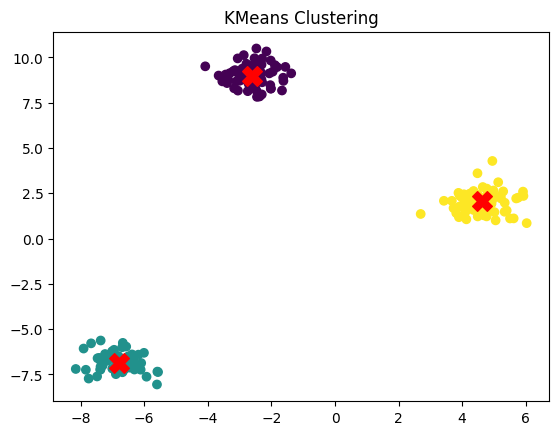

In [196]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42) #make_blobs generates data in exactly 2 features
# No scaling, since all features are already on the same scale (e.g., if you generated them synthetically with make_blobs or all are percentages from 0–100).

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
plt.title("KMeans Clustering")
plt.show()



In [197]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X,y_true = make_blobs(n_samples=200,centers = 3,cluster_std=0.60,random_state = 42)

In [198]:
k_means = KMeans(n_clusters = 3,random_state=42)
k_ymeans =kmeans.fit_predict(X)

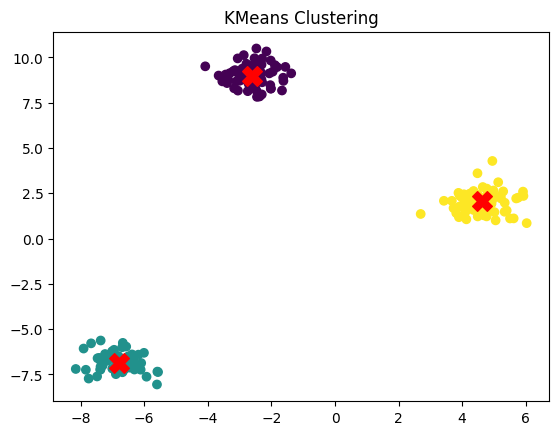

In [199]:
plt.scatter(X[:,0],X[:,1],c=k_ymeans,cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='X')
plt.title('KMeans Clustering')
plt.show()

In [200]:
kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(X)

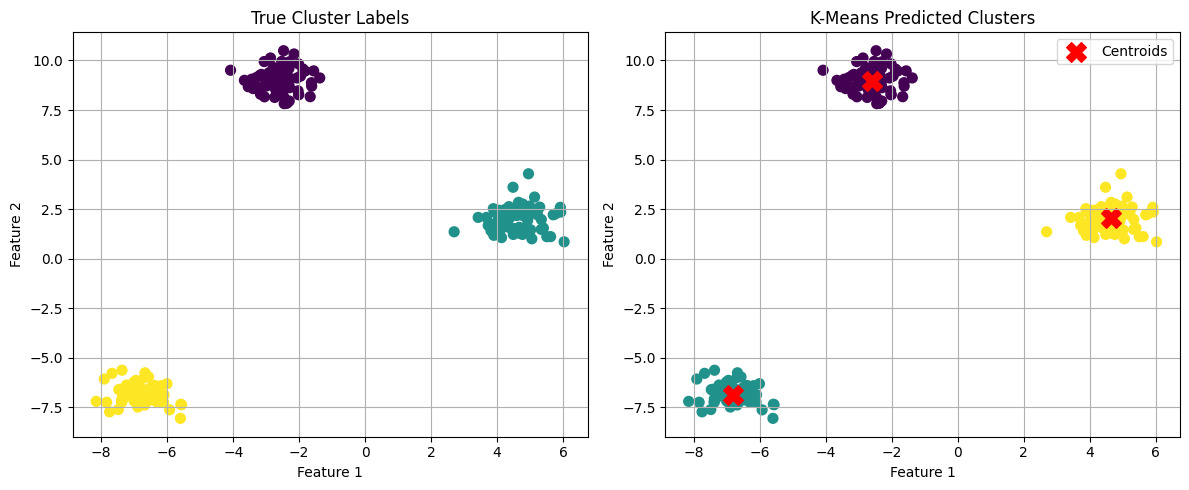

In [201]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=200, centers=3, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# True labels
axes[0].scatter(X[:,0], X[:,1], c=y_true, cmap='viridis', s=50)
axes[0].set_title('True Cluster Labels')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)

# K-Means predicted labels
axes[1].scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
axes[1].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
                s=200, c='red', marker='X', label='Centroids')
axes[1].set_title('K-Means Predicted Clusters')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [203]:
#load the iris dataset
iris = load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [204]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [205]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [206]:
#Standardize features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [207]:
inertia_values = []
k_values = range(1,11)

In [208]:
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

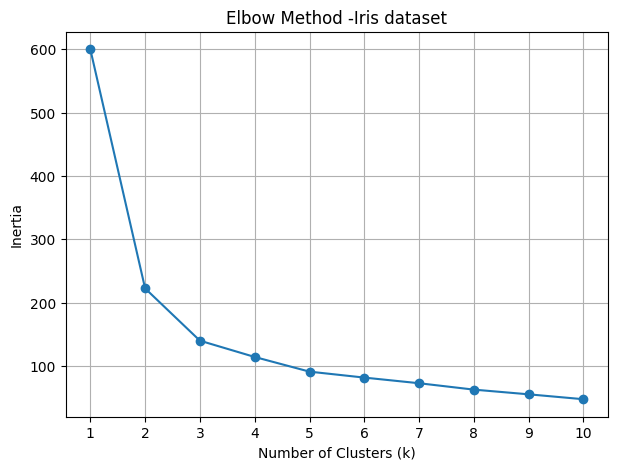

In [209]:
plt.figure(figsize=(7,5))
plt.plot(k_values,inertia_values,marker='o')
plt.title('Elbow Method -Iris dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [210]:
#5 Apply Kmeans with chosen k (e.g, k = 3)
best_k = 3

In [211]:
k_means = KMeans(n_clusters=best_k,random_state= 42,n_init=10)

In [212]:
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Cluster
0                5.1               3.5  ...               0.2        6
1                4.9               3.0  ...               0.2        2
2                4.7               3.2  ...               0.2        2
3                4.6               3.1  ...               0.2        2
4                5.0               3.6  ...               0.2        6

[5 rows x 5 columns]


In [213]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

In [214]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [215]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [216]:
#Perform hierarchical clustering using Ward's method

In [217]:
linked = linkage(X_scaled,method='ward')
print(linked)

[[1.01000000e+02 1.42000000e+02 0.00000000e+00 2.00000000e+00]
 [7.00000000e+00 3.90000000e+01 1.21167870e-01 2.00000000e+00]
 [1.00000000e+01 4.80000000e+01 1.21167870e-01 2.00000000e+00]
 [0.00000000e+00 1.70000000e+01 1.31632184e-01 2.00000000e+00]
 [9.00000000e+00 3.40000000e+01 1.31632184e-01 2.00000000e+00]
 [1.28000000e+02 1.32000000e+02 1.31632184e-01 2.00000000e+00]
 [1.27000000e+02 1.38000000e+02 1.33836265e-01 2.00000000e+00]
 [2.00000000e+00 4.70000000e+01 1.33836265e-01 2.00000000e+00]
 [1.90000000e+01 4.60000000e+01 1.43378956e-01 2.00000000e+00]
 [8.00000000e+01 8.10000000e+01 1.43378956e-01 2.00000000e+00]
 [1.00000000e+00 2.50000000e+01 1.66143388e-01 2.00000000e+00]
 [1.20000000e+02 1.43000000e+02 1.66143388e-01 2.00000000e+00]
 [1.10000000e+01 2.40000000e+01 1.70512281e-01 2.00000000e+00]
 [4.00000000e+01 1.53000000e+02 1.72216546e-01 3.00000000e+00]
 [3.00000000e+01 1.54000000e+02 1.72216546e-01 3.00000000e+00]
 [2.90000000e+01 1.57000000e+02 1.78366645e-01 3.000000

In [218]:
#Assign cluster labels (e.g. cut dendogram at 3 clusters)
labels = fcluster(linked,t=3,criterion='maxclust')

In [219]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [220]:
df['Clusters'] = labels

In [221]:
#view first few rows with cluster assignments
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Clusters
0                  5.1               3.5  ...               0.2         1
1                  4.9               3.0  ...               0.2         1
2                  4.7               3.2  ...               0.2         1
3                  4.6               3.1  ...               0.2         1
4                  5.0               3.6  ...               0.2         1
..                 ...               ...  ...               ...       ...
145                6.7               3.0  ...               2.3         3
146                6.3               2.5  ...               1.9         3
147                6.5               3.0  ...               2.0         3
148                6.2               3.4  ...               2.3         3
149                5.9               3.0  ...               1.8         3

[150 rows x 5 columns]


In [222]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [223]:
#Load the iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [224]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [225]:
#Elbow method to choose best k
inertia_values = []
k_values = range(1,11)

In [226]:
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

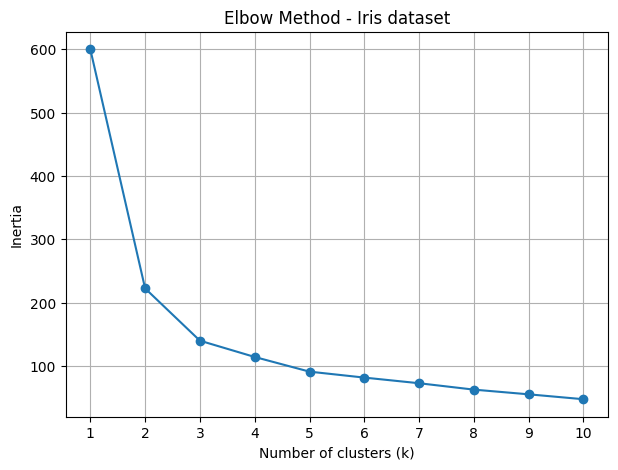

In [227]:
#Plot elbow curve
plt.figure(figsize=(7,5))
plt.plot(k_values,inertia_values,marker='o')
plt.title('Elbow Method - Iris dataset')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [228]:
#apply kmeans with chosen k (e.g k=3)
best_k = 3
kmeans=KMeans(n_clusters=best_k,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled) #cluster label on original data

In [229]:
#reduce dimentions with PCA for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [230]:
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

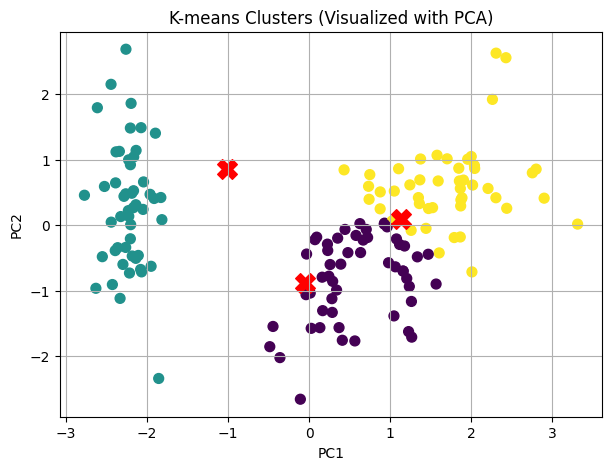

In [231]:
#Plot clusters in 2D PCA space
plt.figure(figsize=(7,5))
plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'],cmap='viridis',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='X') #cluster centers projected in PCA space
plt.title('K-means Clusters (Visualized with PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

In [232]:
print(df.head())

   sepal length (cm)  sepal width (cm)  ...       PC1       PC2
0                5.1               3.5  ... -2.264703  0.480027
1                4.9               3.0  ... -2.080961 -0.674134
2                4.7               3.2  ... -2.364229 -0.341908
3                4.6               3.1  ... -2.299384 -0.597395
4                5.0               3.6  ... -2.389842  0.646835

[5 rows x 7 columns]


In [233]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
import matplotlib.pyplot as plt



In [234]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [235]:
#standarize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [236]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [237]:
#perform hierarchical clustering using Ward's method
linked = linkage(X_pca,method='ward')

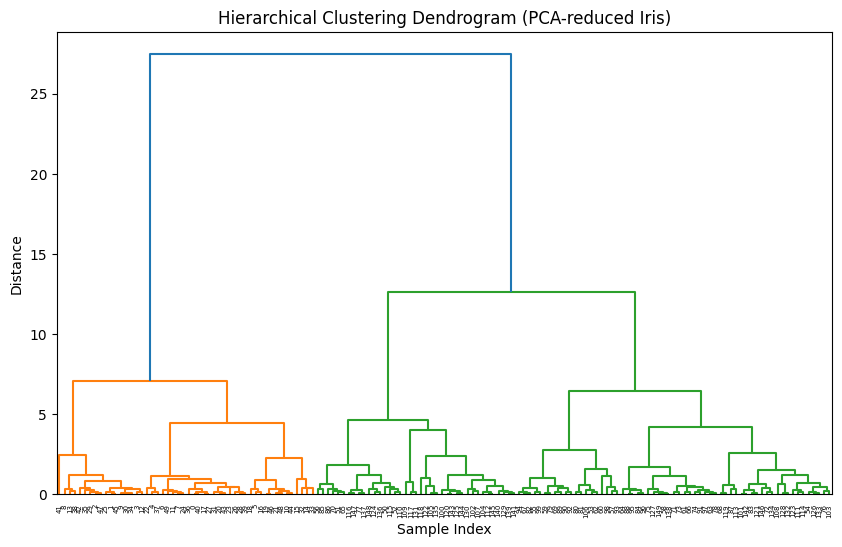

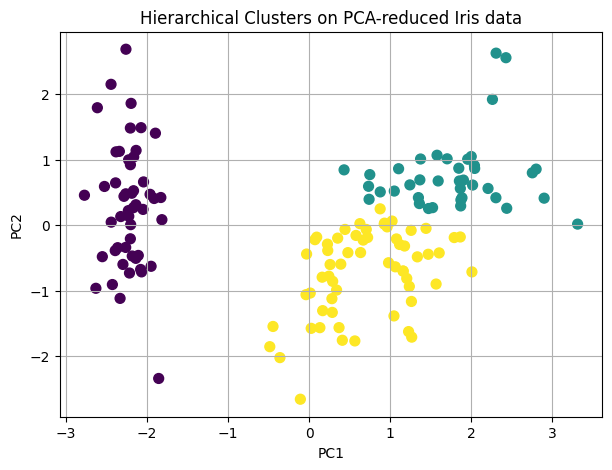

   sepal length (cm)  sepal width (cm)  ...       PC1       PC2
0                5.1               3.5  ... -2.264703  0.480027
1                4.9               3.0  ... -2.080961 -0.674134
2                4.7               3.2  ... -2.364229 -0.341908
3                4.6               3.1  ... -2.299384 -0.597395
4                5.0               3.6  ... -2.389842  0.646835

[5 rows x 7 columns]


In [238]:
#plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked,labels=df.index, #or labels =None for default
           distance_sort = 'ascending',show_leaf_counts=True
           )
plt.title('Hierarchical Clustering Dendrogram (PCA-reduced Iris)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#assign cluster labels (cut dendrogram at 3 clusters)

labels=fcluster(linked,t=3,criterion='maxclust')
df['Cluster']= labels

#Optional: add PCs for 2D scatter plot
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

#scatter plot to visualize clusters
plt.figure(figsize=(7,5))
plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'],cmap='viridis',s=50)
plt.title('Hierarchical Clusters on PCA-reduced Iris data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
print(df.head())

In [239]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [240]:
#Load iris dataset
iris = load_iris()
X = iris.data #features
y = iris.target #class labels

df = pd.DataFrame(X,columns=iris.feature_names)
df['Species'] = y

In [241]:
#Standarize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [242]:
# apply LDA
#Reduce to 2 linear discrimiants (max C-1 =2 for iris)
lda= LDA(n_components= 2)
X_lda = lda.fit_transform(X_scaled,y)


In [243]:
# Add LDA components to DataFrame for plotting
df['LD1'] = X_lda[:,0]
df['LD2'] = X_lda[:,1]

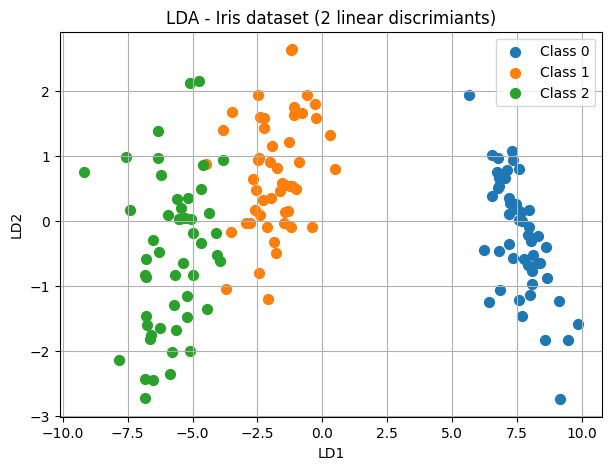

In [244]:
#Plot LDA projection
plt.figure(figsize=(7,5))
for label in df['Species'].unique():
    plt.scatter(df[df['Species']==label]['LD1'], df[df['Species']==label]['LD2'],label=f"Class {label}",s=50)
plt.title('LDA - Iris dataset (2 linear discrimiants)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

In [245]:
print(df.head())

   sepal length (cm)  sepal width (cm)  ...       LD1       LD2
0                5.1               3.5  ...  8.061800 -0.300421
1                4.9               3.0  ...  7.128688  0.786660
2                4.7               3.2  ...  7.489828  0.265384
3                4.6               3.1  ...  6.813201  0.670631
4                5.0               3.6  ...  8.132309 -0.514463

[5 rows x 7 columns]


In [246]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


In [247]:
#load_dataset
iris = load_iris()
X,y = iris.data,iris.target

In [248]:
#split dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [249]:
#Initialize k-NN by k=5
knn=KNeighborsClassifier(n_neighbors=5)


In [250]:
# Train (stores training data)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [251]:
#Predict
y_pred = knn.predict(X_test)

In [252]:
#Evaluate
print(f"Accuracy: {accuracy_score(y_test,y_pred):.3f}")
print(classification_report(y_test,y_pred,target_names=iris.target_names))

Accuracy: 1.000
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [253]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [254]:
#create a simple linearly separatable dataset
X,y=datasets.make_blobs(n_samples=10,centers=2,random_state=42,cluster_std=1.0)


In [255]:
#Train Linear SVM
clf = SVC(kernel='linear',C=1.0)
clf.fit(X,y)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [256]:
#Print model parameters
print("Coefficients (w):",clf.coef_)
print('Intercept (b):',clf.intercept_)
print("support Vectors:\n",clf.support_vectors_)

Coefficients (w): [[ 0.20355574 -0.16623457]]
Intercept (b): [0.64194141]
support Vectors:
 [[-2.26723535  7.10100588]
 [ 3.62704772  2.28741702]]


In [257]:
#predict for a new sample
new_point = [[2,5]]
prediction=clf.predict(new_point)
print(f"Prediction for {new_point} -> Class {prediction[0]}")

Prediction for [[2, 5]] -> Class 1


In [258]:
print(prediction)

[1]


In [259]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC

In [260]:
#create a non-linearly separatable dataset (two concentric circles)
X,y=datasets.make_circles(n_samples=100,factor=0.5,noise=0.1,random_state=42)


In [261]:
#Train SVM with RBF kernel
clf = SVC(kernel='rbf',C=1.0,gamma='scale')
#gamma -> Controls how far the influence of a single training point reaches. 
# Low y-> smoother decision boundry. 
# High y-> tighter, more complex boundary (risk of over fitting)
clf.fit(X,y)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [262]:
#Predict for a new point
new_point=[[0.6,-0.2]]
prediction=clf.predict(new_point)
print(f"Prediction for {new_point} -> Class {prediction[0]}")

Prediction for [[0.6, -0.2]] -> Class 1


In [263]:
#Model details
print("Number of support vectors for each class:",clf.n_support_)

Number of support vectors for each class: [19 17]


In [264]:
from sklearn.svm import SVR
import numpy as np

In [265]:
#Sample data
X=np.array([[1],[2],[3],[4],[5],[6],[7]]).astype(float)
y=np.array([1.5,1.7,3.2,3.8,5.1,6.2,7.4])

In [266]:
#Create and fit SVR model
#kernel = 'linear' -> fits a straight-line (or flat hyperplane) relationship

In [267]:
svr = SVR(kernel='linear',C=100,epsilon=0.1)
svr.fit(X,y)

#Predictions
X_test=np.array([[1.5],[3.5],[6.5]])
predictions=svr.predict(X_test)
print("Predictions:",predictions)

Predictions: [1.525 3.625 6.775]


In [268]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [269]:
#Load Iris dataset
iris=load_iris()
X=iris.data #features
y=iris.target #target classes (0,1,2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [270]:
# Create DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', #splitting criterion (gini impurity)
                             max_depth=3, #maximum depth of tree
                             random_state=42)

In [271]:
#train the classifier
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [272]:
y_pred=clf.predict(X_test)

In [273]:
#Evaluate
print("Acucuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Acucuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



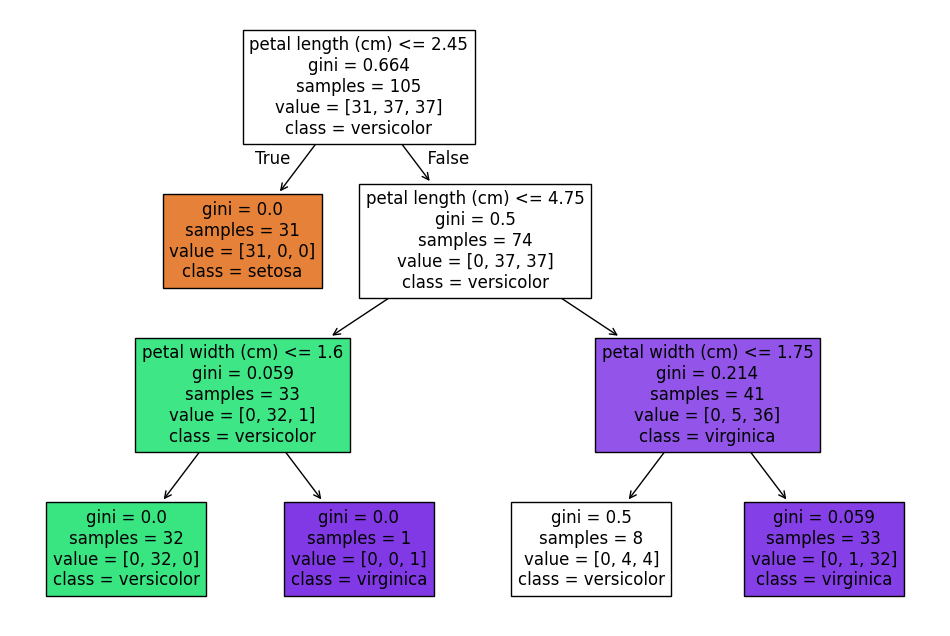

In [274]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [275]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt

In [276]:
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.3,random_state=42)

In [277]:
clf_full=DecisionTreeClassifier(random_state=42)
clf_full.fit(X_train,y_train)
print("Accuracy (full tree):",clf_full.score(X_test,y_test))

Accuracy (full tree): 1.0


In [278]:
#Compute cost-complexity pruning path
path=clf_full.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas #candidate alpha values
print("Candidate alpha values:",ccp_alphas)

Candidate alpha values: [0.         0.00923521 0.01269841 0.01269841 0.01847042 0.02705804
 0.25028684 0.31210884]


In [279]:
#Train trees with different alpha Values
#Example: prune with alpha=0.01
alpha = 0.01
clf_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
clf_pruned.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [280]:
print("Accuracy(pruned tree): ",clf_pruned.score(X_test,y_test))

Accuracy(pruned tree):  1.0


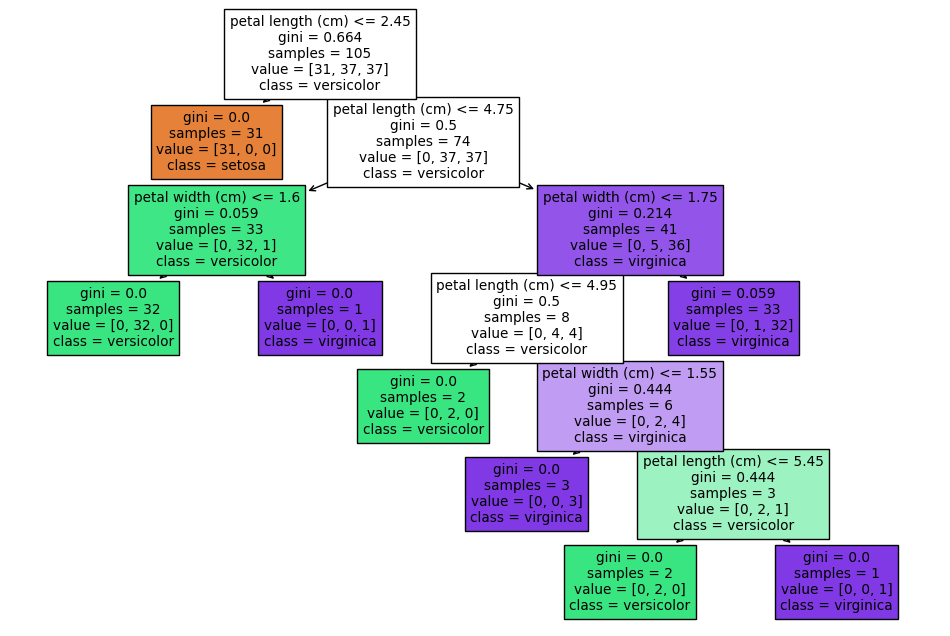

In [281]:
#Visuaize Pruned Tree
plt.figure(figsize=(12,8))
plot_tree(clf_pruned,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [282]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [283]:
#Load a sample dataset
iris=load_iris()
X=iris.data
y=iris.target

In [284]:
#Split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [285]:
# Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=5, #small number for illustration
                            max_depth = 3,
                            bootstrap=True, #use bookstrap sampling (with replacement)
                            random_state=42)

In [286]:
rf.fit(X_train,y_train)


,n_estimators,5
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [287]:
#Check accuracy
accuracy=rf.score(X_test,y_test)
print("Test Accuracy:",accuracy)

Test Accuracy: 1.0


In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [289]:
#Load dataset
iris = load_iris()
X=iris.data
y=iris.target

In [290]:
#Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [291]:
#Create a Decision Tree
base_tree=DecisionTreeClassifier(max_depth=3,random_state=42)

In [292]:
#Wrap it in a Bagging classifier
bagging_model=BaggingClassifier(estimator=base_tree, #Base model
                                n_estimators=10,#Number of trees
                                bootstrap=True, #Sample with replacement
                                n_jobs = -1, #parallelize training
                                random_state=42)

In [293]:
# Train the bagging ensemble
bagging_model.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [294]:
#Evaluate
accuracy=bagging_model.score(X_test,y_test)
print("Test Accuracy:",accuracy)

Test Accuracy: 1.0


In [295]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [296]:
#Load dataset
iris=load_iris()
X=iris.data
y=iris.target

In [297]:
#Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [298]:
#Weak learner: shallow decision tree
weak_tree=DecisionTreeClassifier(max_depth=1)

In [299]:
#AdaBoost ensemble
boost_model=AdaBoostClassifier(estimator=weak_tree,n_estimators=50,#Number of weak learners
                               learning_rate=1, #Step size in correction
                               random_state=42)


In [300]:
#train
boost_model.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,1
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [301]:
#Evaluate
accuracy=boost_model.score(X_test,y_test)
print("Test Accuracy:",accuracy)

Test Accuracy: 1.0


In [302]:
import re


In [319]:
#Sample text
text = """Hello @user, please contact us at example123@test.com.
Our website is https://www.example.com.
I bought 3 apples, 2 bananas, and 1 orange.
#fun #python"""


In [304]:
#Extract emails
emails = re.findall(r'\b[\w.-]+@[\w.-]+\.\w+\b',text)
print("Emails:",emails)

Emails: ['example123@test.com']


In [306]:
#Extract numbers
numbers = re.findall(r'\d+',text)
print("Numbers:",numbers)

Numbers: ['123', '3', '2', '1']


In [307]:
#3 Extract URLs
urls = re.findall(r'https?://[^\s]+',text)
print("URLs:",urls)

URLs: ['https://www.example.com.']


In [308]:
#Extract hashtags
hashtags = re.findall(r'#\w+',text)
print("Hashtags: ",hashtags)

Hashtags:  ['#fun', '#python']


In [309]:
#Extract mentions @username
mentions = re.findall(r'@\w+',text)
print("Mentions:",mentions)

Mentions: ['@user', '@test']


In [313]:
#Remove punctuation (basic text cleaning)
clean_text = re.sub(r'[^\w\s]', '',text)
print(clean_text)

Hello user please contact us at example123testcom
Our website is httpswwwexamplecom
I bought 3 apples 2 bananas and 1 orange
fun python


In [315]:
#7. Split text into words (tokenization)
words = re.split(r'\s+',clean_text)
print("Words:",words)

Words: ['Hello', 'user', 'please', 'contact', 'us', 'at', 'example123testcom', 'Our', 'website', 'is', 'httpswwwexamplecom', 'I', 'bought', '3', 'apples', '2', 'bananas', 'and', '1', 'orange', 'fun', 'python']


In [320]:
#8. Check if text starts with 'Hello'
starts_with_hello=bool(re.match(r'Hello',text))
print("Starts with 'Hello': ",starts_with_hello)

Starts with 'Hello':  True


In [321]:
#Check if text contains only digits (example with a number string)
num_text = '12345'
only_digits = bool(re.fullmatch(r'\d+',num_text))
print('Only digits:',only_digits)

Only digits: True


In [322]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag,FreqDist
import string

In [323]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\william.bai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\william.bai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\william.bai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\william.bai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [324]:
#Sample customer feedbacks
feedbacks = [
    "I love the product! It's amazing and works perfectly.",
    "Terrible experience. The delivery was late and the package was damaged.",
    "Customer service was okay, but the product quality could be better."
]

In [325]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
preprocessed_feedbacks=[]

In [328]:
for text in feedbacks:
    #Sentence tokenization (optional here)
    sentences=sent_tokenize(text)
    #Word tokenization and lowercasing
    words = [word.lower() for word in word_tokenize(text)]
    #Remove punctuation and non-alphabetic tokens
    words = [w for w in words if w.isalpha()]
    #Remove stopwords
    words = [w for w in words if w not in stop_words]
    #POS tagging
    pos_tags = pos_tag(words)
    #Lemmatization
    lemmatized_words = []
    for w,t in pos_tags:
        if t.startswith('J'):
            pos=wordnet.ADJ
        elif t.startswith('V'):
            pos=wordnet.VERB
        elif t.startswith('N'):
            pos=wordnet.NOUN
        elif t.startswith('R'):
            pos=wordnet.ADV
        else:
            pos=wordnet.NOUN
        lemmatized_words.append(lemmatizer.lemmatize(w,pos))
    preprocessed_feedbacks.append(lemmatized_words)
    # Frequency analysis (optional)
    freq_dist = FreqDist(lemmatized_words)
    print("Most common words:", freq_dist.most_common(5))
print("\nPreprocessed Feedbacks:",preprocessed_feedbacks)

Most common words: [('love', 1), ('product', 1), ('amaze', 1), ('work', 1), ('perfectly', 1)]
Most common words: [('terrible', 1), ('experience', 1), ('delivery', 1), ('late', 1), ('package', 1)]
Most common words: [('customer', 1), ('service', 1), ('okay', 1), ('product', 1), ('quality', 1)]

Preprocessed Feedbacks: [['love', 'product', 'amaze', 'work', 'perfectly'], ['terrible', 'experience', 'delivery', 'late', 'package', 'damage'], ['customer', 'service', 'okay', 'product', 'quality', 'could', 'better'], ['love', 'product', 'amaze', 'work', 'perfectly'], ['terrible', 'experience', 'delivery', 'late', 'package', 'damage'], ['customer', 'service', 'okay', 'product', 'quality', 'could', 'better']]


In [330]:
#Text to vector
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#Join the preprocessed words back into strings (one document per feedback)
documents = [" ".join(words) for words in preprocessed_feedbacks]

#1. Bag-of-Words (Bow)
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(documents)

print("BoW Feature Names:",bow_vectorizer.get_feature_names_out())
print("BoW Vectors:\n",X_bow.toarray())

BoW Feature Names: ['amaze' 'better' 'could' 'customer' 'damage' 'delivery' 'experience'
 'late' 'love' 'okay' 'package' 'perfectly' 'product' 'quality' 'service'
 'terrible' 'work']
BoW Vectors:
 [[1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1]
 [0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0]]


In [331]:
#2 TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)
print("\nTF-IDF Freature Names:",tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Vectors:\n",X_tfidf.toarray())


TF-IDF Freature Names: ['amaze' 'better' 'could' 'customer' 'damage' 'delivery' 'experience'
 'late' 'love' 'okay' 'package' 'perfectly' 'product' 'quality' 'service'
 'terrible' 'work']
TF-IDF Vectors:
 [[0.47018286 0.         0.         0.         0.         0.
  0.         0.         0.47018286 0.         0.         0.47018286
  0.34016514 0.         0.         0.         0.47018286]
 [0.         0.         0.         0.         0.40824829 0.40824829
  0.40824829 0.40824829 0.         0.         0.40824829 0.
  0.         0.         0.         0.40824829 0.        ]
 [0.         0.39152771 0.39152771 0.39152771 0.         0.
  0.         0.         0.         0.39152771 0.         0.
  0.28326017 0.39152771 0.39152771 0.         0.        ]
 [0.47018286 0.         0.         0.         0.         0.
  0.         0.         0.47018286 0.         0.         0.47018286
  0.34016514 0.         0.         0.         0.47018286]
 [0.         0.         0.         0.         0.40824829 0.

In [334]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36 stored elements and shape (6, 17)>
  Coords	Values
  (0, 8)	0.4701828574116441
  (0, 12)	0.3401651398731007
  (0, 0)	0.4701828574116441
  (0, 16)	0.4701828574116441
  (0, 11)	0.4701828574116441
  (1, 15)	0.40824829046386296
  (1, 6)	0.40824829046386296
  (1, 5)	0.40824829046386296
  (1, 7)	0.40824829046386296
  (1, 10)	0.40824829046386296
  (1, 4)	0.40824829046386296
  (2, 12)	0.2832601727071819
  (2, 3)	0.39152770752483096
  (2, 14)	0.39152770752483096
  (2, 9)	0.39152770752483096
  (2, 13)	0.39152770752483096
  (2, 2)	0.39152770752483096
  (2, 1)	0.39152770752483096
  (3, 8)	0.4701828574116441
  (3, 12)	0.3401651398731007
  (3, 0)	0.4701828574116441
  (3, 16)	0.4701828574116441
  (3, 11)	0.4701828574116441
  (4, 15)	0.40824829046386296
  (4, 6)	0.40824829046386296
  (4, 5)	0.40824829046386296
  (4, 7)	0.40824829046386296
  (4, 10)	0.40824829046386296
  (4, 4)	0.40824829046386296
  (5, 12)	0.2832601727071819
  (5, 3)	0.3

In [332]:
#sentiment analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [335]:
#Sample sentiment labels for the feedbacks
# 1 = Positive, 0 = Negative
labels = [1,0,0,1,0,1] #Correspoding to the three feedbacks
#Split data into training and test sets (here all data is small, so just demonstration)
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,labels,test_size=0.33,random_state=42)

#Initialize Logistic Regression classifier
model = LogisticRegression()

#Train the model
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [336]:
#Predict on test set
y_pred = model.predict(X_test)

In [337]:
#Evaluate performance
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [352]:
#Optional: Predict sentiment for a new feedback
new_feedback = "The product quality is fantastic and delivery was quick."

In [353]:
#Preprocess new feedback similarly

In [354]:
new_words=[word.lower() for word in word_tokenize(new_feedback) if word.isalpha() and word.lower() not in stop_words]

In [355]:
pos_tags = pos_tag(new_words)

In [356]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [357]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# (run these once if you haven’t already)
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# 1. Define helper function
def get_wordnet_pos(treebank_tag):
    """
    Convert POS tag from nltk.pos_tag (Penn Treebank) 
    to WordNet-compatible tag.
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN   # default to noun


In [358]:
lemmatized_words = [lemmatizer.lemmatize(w,get_wordnet_pos(t)) for w,t in pos_tags]

In [359]:
new_doc = " ".join(lemmatized_words)

In [360]:
#Vectorize and predict
new_vector=tfidf_vectorizer.transform([new_doc])
prediction=model.predict(new_vector)
print("\nSentiment Prediction for new feedback:","Positive" if prediction[0]==1 else "Negative")


Sentiment Prediction for new feedback: Negative


In [ ]:
custom_threshold = 0.3 #example threshold
#y_pred_custom = (proba_class1>=custom_threshold).astype(int)

NameError: name 'proba_class1' is not defined

In [362]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [363]:
#Generate a synthetic binary classification dataset
X,y = make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,random_state=0)

In [364]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42) #Default is 75% training and 25% testing

In [365]:
#Initialize logistic regression with regularization strength C=1.0 (default)
clf = LogisticRegression(C=1.0).fit(X_train,y_train)

In [367]:
#Predict probabilities for the positive class (class 1)
probs = clf.predict_proba(X_test)[:,1] #This step extracts only the probability for class 1
#Each value is between 0 and 1
#Apply the default threshold 0.5 to get predicted labels
labels_default=(probs>=0.5).astype(int)

In [368]:
#Apply a custom threshold 0.7 to get predicted labels
labels_custom = (probs>=0.7).astype(int)

In [373]:
#Print accuracy for both threshold settings
print("Accuracy (t=0.5):",(labels_default==y_test).mean())
print("Accuracy (t=0.7): ",(labels_custom==y_test).mean())

Accuracy (t=0.5): 0.98
Accuracy (t=0.7):  0.98


In [374]:
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [375]:
#generate synthetic dataset -> 5 features, 3 of them info, 500 samples
X,y = make_classification(n_samples=500,n_features=5,n_informative=3,n_redundant=0,random_state=0)


In [376]:
#train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [377]:
#do the model/fitting
model = LogisticRegression().fit(X_train,y_train)
# give me the predict() for test values
y_pred=model.predict(X_test)
#y_pred,y_test
#probs = predict probabilities for class 1 -> ROC-AUC value

In [378]:
y_probs = model.predict_proba(X_test)[:,1]

In [379]:
#CM -> TN,TP 0 ->0,1->1
#FN,FP -> 1->0 FN,0->1,FP

In [380]:
cm = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n{cm}")

Confusion Matrix:
[[61 10]
 [11 43]]


In [381]:
#accuracy = TP+TN/(Total Prediction) #correction predictions
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.3f}")

Accuracy:0.832


In [382]:
#precision=TP/TP+FP #correct positive predictions
precision=precision_score(y_test,y_pred)
print(f"Precision:{precision:.3f}")

Precision:0.811


In [383]:
#recall = TP/TP+FN #how many positives were correctly identified
recall = recall_score(y_test,y_pred)
print(f"recall:{recall:.3f}")

recall:0.796


In [385]:
#F1 score = 2*((Precision*Recall)/(Precision+Recall))
f1 = f1_score(y_test,y_pred)
print(f"F1 score:{f1:.3f}")

F1 score:0.804


In [386]:
#roc-auc value -> separted +ve and -ve class
#1.0 -> perfect separation
#0.5 -> random guesses
#<0.5 -> incorrect guesses
roc_auc = roc_auc_score(y_test,y_probs)
print(f"ROC-AUC score: {roc_auc:.3f}")

ROC-AUC score: 0.900


In [387]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from itertools import product

In [388]:
X,y = make_classification(n_samples=200,n_features =5,random_state=42)
model=LogisticRegression()
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [390]:
#Predict probabilities for class 1
probs = model.predict_proba(X)[:,1]
print(probs)


[0.10658777 0.62489116 0.07223584 0.9048955  0.46670613 0.62431586
 0.09021648 0.84663149 0.67661834 0.94690454 0.56741166 0.83976342
 0.97267745 0.98449972 0.13333781 0.96542174 0.46812063 0.68010347
 0.87568084 0.95139495 0.47641395 0.65347487 0.86665536 0.56055182
 0.0039687  0.01039533 0.21663371 0.24502595 0.46894429 0.75671555
 0.51464062 0.64552556 0.9696918  0.00111155 0.92271884 0.79212622
 0.41382861 0.60067658 0.02852905 0.88709811 0.21838517 0.95314531
 0.99012495 0.58877125 0.78487031 0.94646169 0.09196559 0.01457377
 0.95715219 0.03197004 0.40020359 0.15937175 0.15181707 0.7653518
 0.36544291 0.55678308 0.05213078 0.09159794 0.95592935 0.88716573
 0.85819163 0.90497914 0.25594024 0.54045466 0.07662934 0.9976086
 0.73734127 0.43509203 0.14224989 0.0083841  0.85004797 0.9342695
 0.08906274 0.65531523 0.02743334 0.52712541 0.96721281 0.27161174
 0.8950809  0.98237823 0.11314002 0.9830561  0.69657977 0.92302127
 0.81273907 0.84515759 0.02309497 0.13595285 0.94044546 0.7709903

In [391]:
#Separate event and non-event scores
event_scores=probs[y==1]
non_event_scores=probs[y==0]
concordant=discordant=tied=0

In [392]:
#Compare all event/non-event pairs
for e,ne in product(event_scores,non_event_scores):
    if e>ne:
        concordant+=1
    elif e<ne:
        discordant+=1
    else:
        tied +=1
total_pairs = concordant+discordant+tied

In [393]:
#Compute metrics
conc_ratio_simple=concordant/total_pairs
disc_ratio=discordant/total_pairs
conc_ratio_tie=(concordant+0.5*tied)/total_pairs
cd_ratio=conc_ratio_simple/disc_ratio if disc_ratio>0 else np.inf

In [396]:
# Compute ROC-AUC
roc_auc = roc_auc_score(y,probs)

In [402]:
#Display results
print(f"%Concordant:{100*conc_ratio_simple:.4f}")
print(f"Discordant:{100*disc_ratio:.4f}")
print(f"%tied:{100*(tied/total_pairs):.4f}")
print(f"Concordance Ratio (Simple): {conc_ratio_simple:.4f}")
print(f"Concordance Ratio (Tie-Adjusted):{conc_ratio_tie:.4f}")
print(f"Discordance Ratio:{disc_ratio:.4f}")
print(f"C/D Ratio:{cd_ratio:.4f}")

%Concordant:92.3992
Discordant:7.6008
%tied:0.0000
Concordance Ratio (Simple): 0.9240
Concordance Ratio (Tie-Adjusted):0.9240
Discordance Ratio:0.0760
C/D Ratio:12.1566


In [403]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [404]:
#Load Iris data
iris=load_iris()
X,y=iris.data,iris.target

In [405]:
#Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [406]:
#Initialize and train Gaussian Naive Bayes model
model=GaussianNB()
model.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


In [407]:
#Predict on test set
y_pred=model.predict(X_test)

In [409]:
#Evalaute accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.3f}")

Accuracy:0.978


In [412]:
#Detailed classification report
print(classification_report(y_test,y_pred,target_names=iris.target_names))
#New sample
sample=np.array([[6.0,3.0,4.8,1.8]])


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [414]:
#Predict class probabilities for the sample (posterior probabilities)
posterior_probs = model.predict_proba(sample)
print(f"Posterior probabilities for the sample {sample.flatten()}:")
for class_name,prob in zip(iris.target_names,posterior_probs[0]):
    print(f"{class_name}:{prob:.4f}")

Posterior probabilities for the sample [6.  3.  4.8 1.8]:
setosa:0.0000
versicolor:0.1321
virginica:0.8679


In [415]:
#Predict class label for the sample
predicted_class=model.predict(sample)
print(f"Predicted class for the sample:{iris.target_names[predicted_class[0]]}")

Predicted class for the sample:virginica


In [422]:
pip install certifi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [424]:
import certifi, ssl, shutil
from pathlib import Path

base = certifi.where()
custom = Path.home() / "custom-ca-bundle.pem"
shutil.copyfile(base, custom)

# Append your org CA file:
with open(custom, "ab") as out, open(r"https://ndownloader.figshare.com/files/5975967","rb") as org:
    out.write(b"\n")
    out.write(org.read())

ssl._create_default_https_context = lambda *a, **k: ssl.create_default_context(cafile=str(custom))


OSError: [Errno 22] Invalid argument: 'https://ndownloader.figshare.com/files/5975967'

In [416]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [427]:
categories=['red.sport.baseball','sci.med','comp.graphics']
newsgroups = fetch_20newsgroups()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Basic Constraints of CA cert not marked critical (_ssl.c:1028)>

In [430]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [431]:
#Load example dataset
tips = sns.load_dataset('tips')

In [438]:
#Prepare data: feature matrix X and target y
X=tips[['total_bill']]
y = tips['tip']

In [439]:
#Fit linear regression model (ordinary least squares)
model=LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [440]:
#Coefficients of the fitted line
m=model.coef_[0]
b = model.intercept_
print(f"Fitted line: y={m:.3f}*x+{b:.3f}")

Fitted line: y=0.105*x+0.920


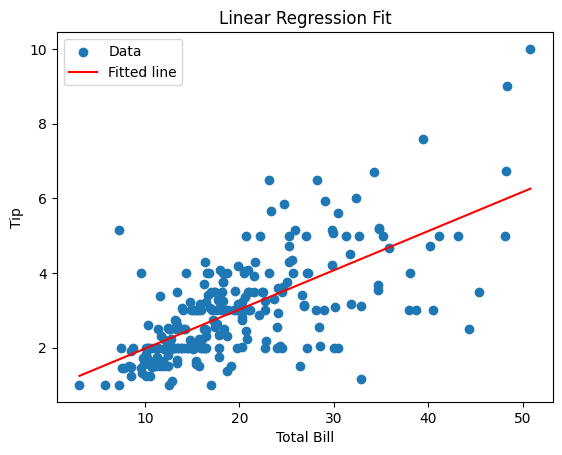

In [443]:
#Plot the data and fitted line
plt.scatter(tips['total_bill'],tips['tip'],label='Data')
x_vals=np.linspace(tips['total_bill'].min(),tips['total_bill'].max(),100)
plt.plot(x_vals,m*x_vals+b,color='red',label='Fitted line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [444]:
#Variables
x = tips['total_bill']
y = tips['tip']


In [445]:
#Means
x_mean= np.mean(x)
y_mean=np.mean(y)

In [446]:
#Numerator & denominator for beta_1 (slope)
numerator=np.sum((x-x_mean)*(y-y_mean))
denominator=np.sum((x-x_mean)**2)

In [447]:
beta1=numerator/denominator
beta0 = y_mean-beta1*x_mean #intercept

In [448]:
#Print fitted line equation
print(f"Fitted line: y={beta1:.3f}+{beta0:.3f}")

Fitted line: y=0.105+0.920


In [449]:
#Create smooth x values for lien
x_vals = np.linspace(x.min(),x.max(),100)
y_vals = beta0+beta1*x_vals

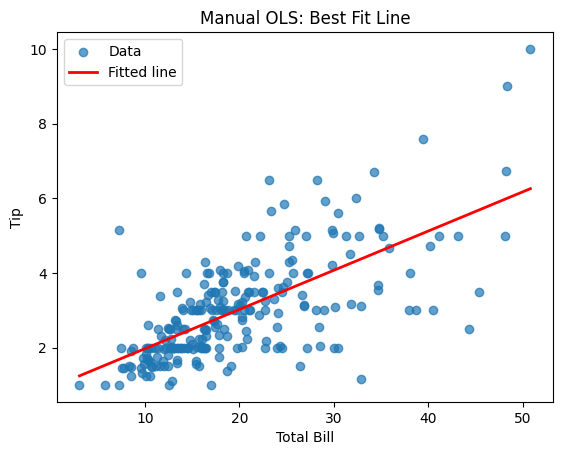

In [450]:
#Plot
plt.scatter(x,y,label='Data',alpha=0.7)
plt.plot(x_vals,y_vals,color='red',label='Fitted line',linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Manual OLS: Best Fit Line')
plt.legend()
plt.show()

In [451]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y,y_pred)
mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)

ValueError: Found input variables with inconsistent numbers of samples: [244, 45]

In [452]:
x = tips['total_bill'].values #ndarray
y=tips['tip'].values
n=len(y)

In [453]:
#Gradient descent settings
alpha = 0.001 #learning rate
iterations=10000 #number of steps


In [454]:
#Initial guesses for m and b
m=0.0
b=0.0

In [456]:
#Gradient Descent loop
for _ in range(iterations):
    y_pred=m*x+b
    error = y_pred-y
    dm=(-2/n)*np.sum(x*(y-y_pred))
    db = (-2/n)*np.sum(y-y_pred)

In [457]:
#Update parameters
m=m-alpha*dm
b=b-alpha*db

In [458]:
print(f"Fitted line (Gradient Descent): y={m:.3f}*x+{b:.3f}")

Fitted line (Gradient Descent): y=0.135*x+0.006


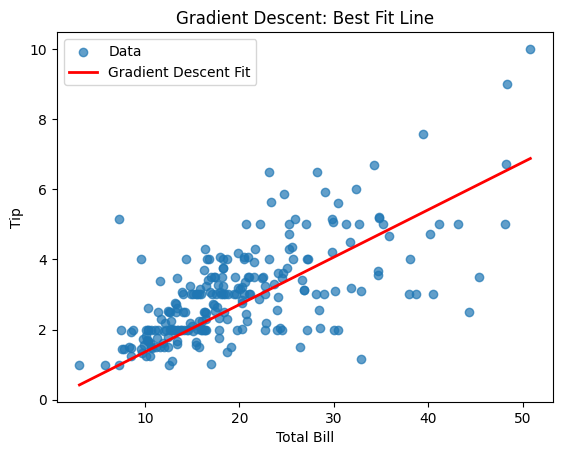

In [462]:
#Create smooth x values for fitted line
x_vals=np.linspace(x.min(),x.max(),100)
y_vals=m*x_vals+b

#Plot
plt.scatter(x,y,label='Data',alpha=0.7)
plt.plot(x_vals,y_vals,color='red',label='Gradient Descent Fit',linewidth=2)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title("Gradient Descent: Best Fit Line")
plt.legend()
plt.show()

In [463]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [464]:
#Load dataset
penguins = sns.load_dataset('penguins').dropna()


In [465]:
#Features and target
X=penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
y=penguins['body_mass_g']

In [466]:
#Initialize and fit model
model=LinearRegression()
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [467]:
#Predictions
y_pred = model.predict(X)
#Evaluate model
r2 = r2_score(y,y_pred)
print(f"R^2 score:{r2:.3f}")

R^2 score:0.764


In [469]:
#Coefficients
coef_df = pd.DataFrame({'Feature':X.columns,'Coefficient':model.coef_})
print(coef_df)

             Feature  Coefficient
0     bill_length_mm     3.292863
1      bill_depth_mm    17.836391
2  flipper_length_mm    50.762132


In [470]:
#New data for prediction (example values)
#Make sure to provide values in the same order and scale as training features
new_data=pd.DataFrame({'bill_length_mm':[45.0],'bill_depth_mm':[15.0],'flipper_length_mm':[210.0]})

In [471]:
#Predict body mass for new data
new_pred = model.predict(new_data)
print(f"Predicted body mass for new input: {new_pred[0]:.2f} grams")

Predicted body mass for new input: 4630.30 grams


In [472]:
#Predicted values
y_pred = model.predict(X)
#Residuals
residuals = y-y_pred

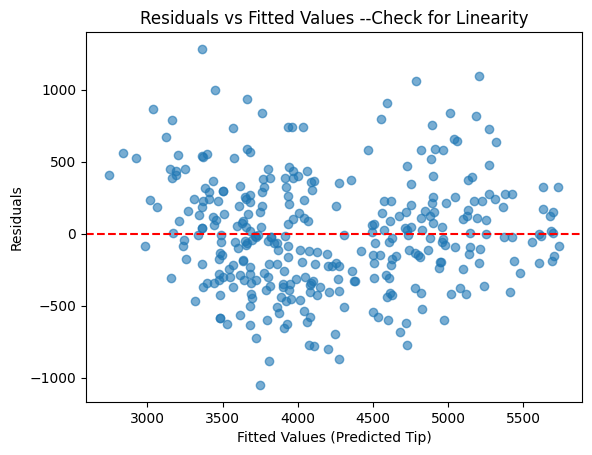

In [474]:
#Plot residuals vs fitted values
plt.scatter(y_pred,residuals,alpha=0.6)
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Fitted Values (Predicted Tip)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values --Check for Linearity')
plt.show()

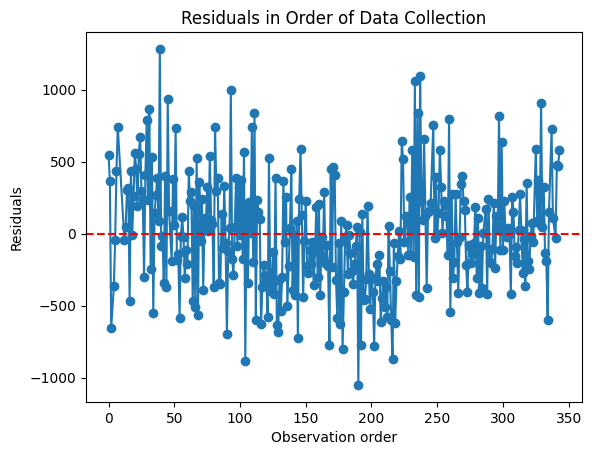

In [475]:
plt.plot(residuals,marker='o')
plt.axhline(0,color='red',linestyle='--')
plt.xlabel('Observation order')
plt.ylabel('Residuals')
plt.title('Residuals in Order of Data Collection')
plt.show()